## INFO 2950 Group Project Phase 3

Nichole Zheng (nz268) & Hedy Song (ys565)

### Updated Research Question:

How do linguistic features in YouTube titles and tags influence its duration on the trending list for the time period 2017–2018 in the United States and the United Kingdom?

*Note: We have refined our project to incorporate additional complexity based on the Phase 2 feedback. We also included the extra data cleaning steps recommended by our reviewers after the preregistration plan.*

*We initially considered comparing the United States with Japan or Korea to explore the influence of linguistic and cultural differences. However, we encountered significant encoding issues in those datasets (titles displayed as unreadable characters). As a result, we decided to focus on a cross-country comparison between the United States and the United Kingdom, as we believe these two countries still present meaningful linguistic and cultural contrasts compared to the previous U.S.–Canada pairing.*

## Preregistration Plan

---

### **Preregistration Statement 1**

**Hypothesis 1:**  
The relationship between capitalization and trending duration varies by country — specifically, videos with more capitalized words in their titles and/or tags tend to remain trending longer, but the strength of this effect differs across regions.

**Analysis Plan:**  
We will merge trending video data from the two countries (US and UK) and include a categorical variable for country.  
We will fit the following multiple linear regression model:

$$
\text{trending\_days} = \beta_0 + \beta_1(\text{num\_capitalized\_words}) + \beta_2(\text{country}) + \beta_3(\text{num\_capitalized\_words} \times \text{country}) + \varepsilon
$$

The interaction term $$(\text{num\_capitalized\_words} \times \text{country})$$ will test whether capitalization impacts trending duration differently across countries.  
We will evaluate the statistical significance of β3.

---

### **Preregistration Statement 2**

**Hypothesis 2:**  
Emotionally charged *categories* of keywords in video titles (e.g., `emotional_keywords`, `search_keywords`, and `trend_2017_2018_keywords`) are positively associated with trending duration, and the strength of this association differs across countries.

**Analysis Plan:**  
We will construct binary indicator variables for the presence of keywords from each of the three emotional categories in a title.  
The following multiple linear regression model will be estimated:

$$
\text{trending\_days} =
\beta_0 +
\beta_1(\text{emotional\_keywords}) +
\beta_2(\text{search\_keywords}) +
\beta_3(\text{trend\_2017\_2018\_keywords}) +
\beta_4(\text{country}) +
$$
$$
\beta_5(\text{emotional\_keywords} \times \text{country}) +
\beta_6(\text{search\_keywords} \times \text{country}) +
\beta_7(\text{trend\_2017\_2018\_keywords} \times \text{country}) +
\varepsilon
$$

We will test whether $$\beta_1, \beta_2, \beta_3 > 0$$, indicating that emotionally charged, search-oriented, or trend-related titles increase trending duration, and whether interaction terms $$\beta_5, \beta_6, \beta_7$$  show cross-country variation in these effects.

---

### **Questions for Reviewers**
- How should we proceed if we conducted the linear regressions and found that most variables are not statistically significant and the R-squared value is low?
- What diagnostic checks or validation techniques should we include to ensure the robustness of our regression model and conclusions?
- If the model performs poorly for US and UK, how should we decide whether to keep the cross-country comparison or focus on one representative region (like the US)?
- What would be the best way to test whether the relationship between emotional keywords and trending duration differs significantly across countries?


### Data cleaning recommended by our feedback for phase 2

In [1]:
import pandas as pd
from datetime import datetime
import json
import matplotlib.pyplot as plt
import re
import statsmodels.api as sm

In [2]:
# Load the dataset
df = pd.read_csv("cleaned_USvideos_all.csv", encoding='utf-8')

#### Added total_trending_days to dataset
Removes duplicate rows based on the title column, keeping only the first occurrence of each unique title then calculated total_trending_days as how many times each title appears in the dataset.

In [3]:
df_unique = df.drop_duplicates('title').copy()
df_unique['total_trending_days'] = df.groupby('title')['title'].transform('count')

#### Added Num_words_title and Capitalized_words_title

Calculate the number of total words and the number of fully capitalized words in the title

In [4]:
# Count total words in the title
df_unique['Num_words_title'] = df_unique['title'].apply(lambda x: len(str(x).split()))

# Count number of fully capitalized words (e.g., 'NEW', 'OMG')
df_unique['Capitalized_words_title'] = df_unique['title'].apply(
    lambda x: len(re.findall(r'\b[A-Z]{2,}\b', str(x)))
)

# Quick check
df_unique[['title', 'Num_words_title', 'Capitalized_words_title']].head()

,title,Num_words_title,Capitalized_words_title
0,WE WANT TO TALK ABOUT OUR MARRIAGE,7,7
1,The Trump Presidency: Last Week Tonight with J...,10,1
2,"Racist Superman | Rudy Mancuso, King Bach & Le...",10,0
3,Nickelback Lyrics: Real or Fake?,5,0
4,I Dare You: GOING BALD!?,5,2


#### Add publish hour in dataset

Made sure it's in datetime format and then extract the hour of published time for futher anaylsis.

In [5]:
# Make sure it's in datetime format first
df_unique['publish_time'] = pd.to_datetime(df_unique['publish_time'], errors='coerce')

# Extract the hour (0–23)
df_unique['publish_hour'] = df_unique['publish_time'].dt.hour

#### Plot for analyzing the trends by hours

Created a new variable with the dataset of publish_hours and total_trending_days to examine the trend.

**Observation**: The most best time of day to publish video, in order to go trending, is around 12pm and 9pm.

In [6]:
hourly_trending = (
    df_unique.groupby('publish_hour')['total_trending_days']
      .mean()
      .reset_index()
      .sort_values('publish_hour')
)

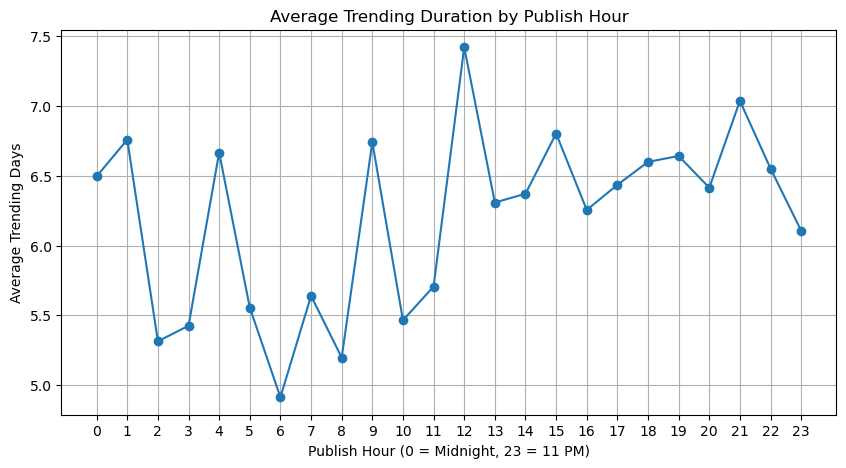

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(hourly_trending['publish_hour'], hourly_trending['total_trending_days'], marker='o')
plt.title('Average Trending Duration by Publish Hour')
plt.xlabel('Publish Hour (0 = Midnight, 23 = 11 PM)')
plt.ylabel('Average Trending Days')
plt.grid(True)
plt.xticks(range(0,24))
plt.show()

In [8]:
print(df_unique.head())

      video_id trending_date  \
0  2kyS6SvSYSE    2017-11-14   
1  1ZAPwfrtAFY    2017-11-14   
2  5qpjK5DgCt4    2017-11-14   
3  puqaWrEC7tY    2017-11-14   
4  d380meD0W0M    2017-11-14   

                                               title          channel_title  \
0                 WE WANT TO TALK ABOUT OUR MARRIAGE           CaseyNeistat   
1  The Trump Presidency: Last Week Tonight with J...        LastWeekTonight   
2  Racist Superman | Rudy Mancuso, King Bach & Le...           Rudy Mancuso   
3                   Nickelback Lyrics: Real or Fake?  Good Mythical Morning   
4                           I Dare You: GOING BALD!?               nigahiga   

   category_id        publish_time  \
0           22 2017-11-13 17:13:01   
1           24 2017-11-13 07:30:00   
2           23 2017-11-12 19:05:24   
3           24 2017-11-13 11:00:04   
4           24 2017-11-12 18:01:41   

                                                tags    views   likes  \
0                             